In [3]:
# Data manipulation and analysis
import pandas as pd

# Numerical operations
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scientific and statistical functions
from scipy import stats

In [5]:
df = pd.read_csv('/Users/ishaankapoor/Desktop/Datasets for project practice/covid_dataset.csv')

In [7]:
df.head()

,Unnamed: 0,country,code,confirmed,recovered,critical,deaths,lastChange,lastUpdate
0,0,Afghanistan,AF,234174,211080,0,7996,2024-06-04T00:18:51+00:00,2024-08-09T09:13:41+00:00
1,2,Albania,AL,334863,330233,0,3605,2024-06-04T00:27:05+00:00,2024-08-09T09:13:41+00:00
2,3,Algeria,DZ,272010,183061,0,6881,2024-06-04T00:19:02+00:00,2024-08-09T09:13:41+00:00
3,5,Andorra,AD,48015,47563,0,165,2024-02-11T22:05:54+00:00,2024-08-09T09:13:41+00:00
4,6,Angola,AO,107327,103419,0,1937,2024-06-04T00:20:45+00:00,2024-08-09T09:13:41+00:00


In [9]:
print(df.info())        # Provides column names, data types, and non-null counts
print(df.describe())    # Shows summary statistics for numeric columns
print(df.isnull().sum()) # Identifies columns with missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  225 non-null    int64 
 1   country     225 non-null    object
 2   code        224 non-null    object
 3   confirmed   225 non-null    int64 
 4   recovered   225 non-null    int64 
 5   critical    225 non-null    int64 
 6   deaths      225 non-null    int64 
 7   lastChange  225 non-null    object
 8   lastUpdate  225 non-null    object
dtypes: int64(5), object(4)
memory usage: 15.9+ KB
None
       Unnamed: 0     confirmed     recovered    critical        deaths
count  225.000000  2.250000e+02  2.250000e+02  225.000000  2.250000e+02
mean   124.328889  3.116295e+06  2.624231e+06   12.786667  3.117617e+04
std     71.171186  1.014304e+07  9.313309e+06   72.089718  1.105688e+05
min      0.000000  1.000000e+01  0.000000e+00    0.000000  0.000000e+00
25%     63.000000  2.733400e+04  1.54270

In [11]:
# 2.1 Dropping the unnecessary 'Unnamed: 0' column
df_cleaned = df.drop(columns=['Unnamed: 0'])

In [13]:
#2.2 Handling missing value in 'code' column
df_cleaned['code'].fillna(df_cleaned['code'].mode()[0], inplace=True)

In [15]:
#2.3 COnverting 'lastChange' and 'lastupdate' to datetime format
df_cleaned['lastChange'] = pd.to_datetime(df_cleaned['lastChange'], errors='coerce')
df_cleaned['lastUpdate'] = pd.to_datetime(df_cleaned['lastUpdate'], errors = 'coerce')

In [17]:
#2.4 Remove duplicate rows
df_cleaned.drop_duplicates(inplace = True)

In [19]:
#2.5 Detect outliers using IQR method

def detect_outliers_iqr (data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3-Q1
    outliers = data[(data[column] < (Q1 - 1.5 * IQR)) | (data[column] > (Q3 + 1.5 * IQR))]
    return outliers

outliers_confirmed = detect_outliers_iqr(df_cleaned, 'confirmed')
outliers_recovered = detect_outliers_iqr(df_cleaned, 'recovered')
outliers_critical = detect_outliers_iqr(df_cleaned, 'critical')
outliers_deaths = detect_outliers_iqr(df_cleaned, 'deaths')

In [21]:
#Exploratory Data Analysis

import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
#Descriptive statistics
desc_stats = df_cleaned[('confirmed','recovered','crititcal','deaths']].describe()

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2768603975.py, line 2)

In [25]:
#Descriptive statistics
desc_stats = df_cleaned[['confirmed','recovered','crititcal','deaths']].describe()

KeyError: "['crititcal'] not in index"

In [27]:
#Descriptive statistics
desc_stats = df_cleaned[['confirmed','recovered','critical','deaths']].describe()

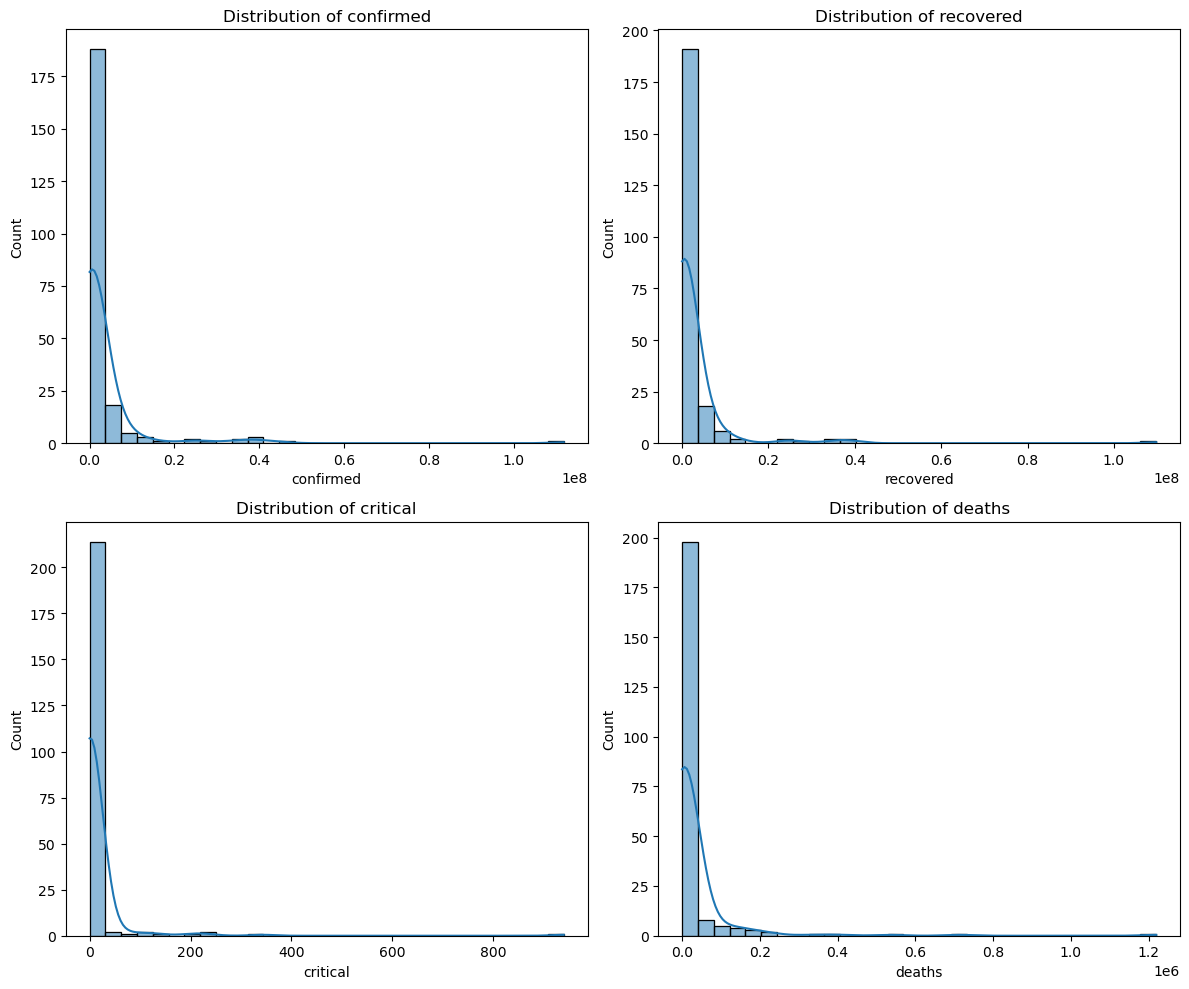

In [29]:
#3.2 Visualizations - Histograms
plt.figure(figsize=(12,10))
for i, column in enumerate(['confirmed', 'recovered', 'critical', 'deaths'], 1):
    plt.subplot(2,2,i)
    sns.histplot(df_cleaned[column], kde=True, bins = 30)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

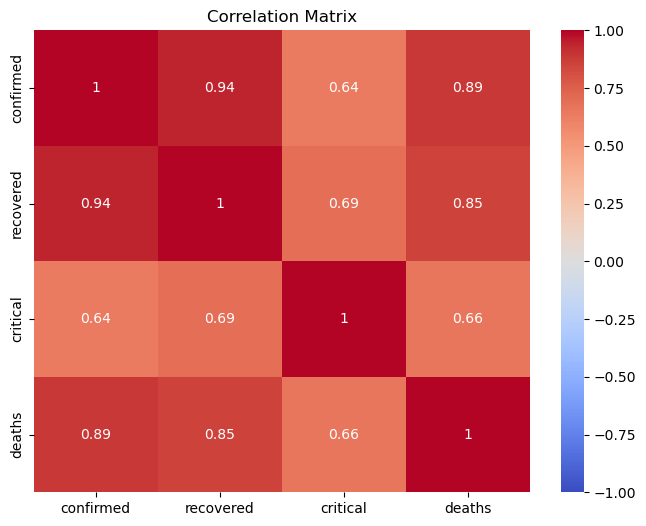

In [31]:
#3.3 Correlation Matrix
correlation_matrix = df_cleaned[['confirmed','recovered','critical','deaths']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [33]:
from scipy.stats import ttest_ind, pearsonr

In [35]:
# 5.1 Pearson correlation test for 'confirmed' and 'deaths'
corr, p_value = pearsonr(df_encoded['confirmed'], df_encoded['deaths'])

NameError: name 'df_encoded' is not defined

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 4.1 Extracting year and month from 'lastChange' and 'lastUpdate'
df_cleaned['lastChange_year'] = df_cleaned['lastChange'].dt.year
df_cleaned['lastChange_month'] = df_cleaned['lastChange'].dt.month
df_cleaned['lastUpdate_year'] = df_cleaned['lastUpdate'].dt.year
df_cleaned['lastUpdate_month'] = df_cleaned['lastUpdate'].dt.month


In [39]:
# 4.2 One-Hot Encoding for 'country'
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_countries = encoder.fit_transform(df_cleaned[['country']])
encoded_countries_df = pd.DataFrame(encoded_countries, columns=encoder.get_feature_names_out(['country']))
df_encoded = pd.concat([df_cleaned.reset_index(drop=True), encoded_countries_df], axis=1)

In [41]:
# 4.3 Scaling numerical columns
scaler = StandardScaler()
df_encoded[['confirmed_scaled', 'recovered_scaled', 'critical_scaled', 'deaths_scaled']] = scaler.fit_transform(
    df_encoded[['confirmed', 'recovered', 'critical', 'deaths']])

In [43]:
from scipy.stats import ttest_ind, pearsonr

In [45]:
# 5.1 Pearson correlation test for 'confirmed' and 'deaths'
corr, p_value = pearsonr(df_encoded['confirmed'], df_encoded['deaths'])

In [47]:
# 5.2 Aggregating confirmed cases over 'lastUpdate' date
time_trend = df_encoded.groupby(['lastUpdate_year', 'lastUpdate_month'])['confirmed'].sum()
print(corr, p_value)
print(time_trend.head())

0.8865157294585542 1.382150503039229e-76
lastUpdate_year  lastUpdate_month
2020             12                         16
2024             8                   701166415
Name: confirmed, dtype: int64


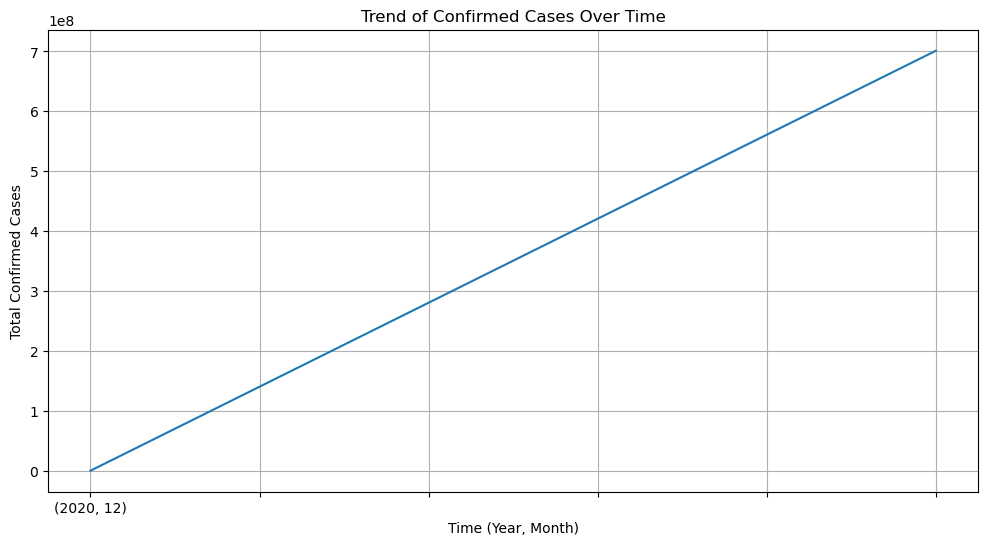

In [49]:
# 6.1 Trend Line for confirmed cases over time
plt.figure(figsize=(12, 6))
time_trend.plot(kind='line')
plt.title("Trend of Confirmed Cases Over Time")
plt.xlabel("Time (Year, Month)")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)
plt.show()

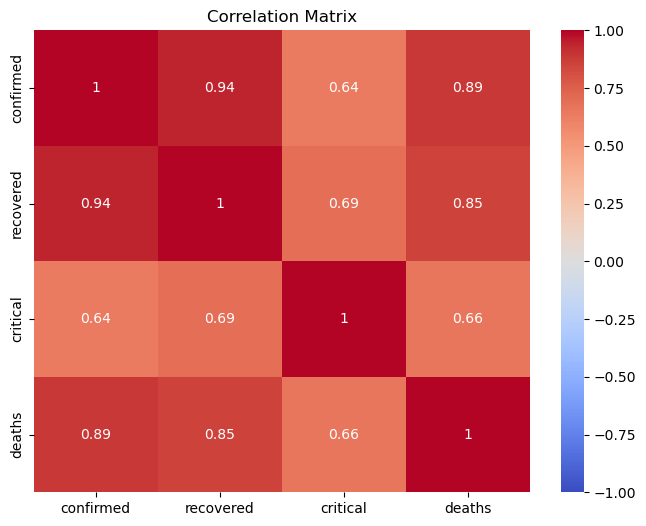

In [51]:
# 6.2 Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()